# Research topics in Data Mining

little introduction here

## Read and preprocess the data

In [1]:
import sys
sys.path.append("..")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from src.preprocess import read_data
from src.visualization import plot_feature_importance, plot_correlation_matrix, plot_distribution
from src.missing_data import *

import warnings
warnings.filterwarnings('ignore')

CSV_FILE = "../data/data.csv"

X, y = read_data(CSV_FILE)
X.to_csv(r'export_dataframe.csv', index = False, header=True)
X.head()
y.head()

Dropping 21 columns...
DataFrame shape: (569, 12)
Label distribution:
0    0.627417
1    0.372583
Name: diagnosis, dtype: float64


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Implement missing data functions

### PyAmpute library

In [2]:
df_incomplete = get_missing_df(X, 0.3, "MAR", ["compactness"])
df_incomplete

2022-10-14 17:57:29,619 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,NaN,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,NaN,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,NaN,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,NaN,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,NaN,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,NaN,0.35140,0.15200,0.2397,0.07016


### 5% Missing Values

In [3]:
MAR_05 = get_missing_df(X, 0.05, "MAR", ["compactness"])
MCAR_05 = get_missing_df(X, 0.05, "MCAR", ["compactness"])
MNAR_05 = get_missing_df(X, 0.05, "MNAR", ["compactness"])

MAR_05

2022-10-14 17:57:29,636 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:29,646 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:29,654 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,NaN,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


### 10% Missing Values

In [4]:
MAR_10 = get_missing_df(X, 0.10, "MAR", ["compactness"])
MCAR_10 = get_missing_df(X, 0.10, "MCAR", ["compactness"])
MNAR_10 = get_missing_df(X, 0.10, "MNAR", ["compactness"])

MCAR_10

2022-10-14 17:57:29,675 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:29,681 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:29,686 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,NaN,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,NaN,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


### 30% Missing Values

In [5]:
MAR_30 = get_missing_df(X, 0.30, "MAR", ["compactness"])
MCAR_30 = get_missing_df(X, 0.30, "MCAR", ["compactness"])
MNAR_30 = get_missing_df(X, 0.30, "MNAR", ["compactness"])

MNAR_30

2022-10-14 17:57:29,700 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:29,708 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:29,711 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,NaN,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,NaN,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,NaN,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,NaN,0.35140,0.15200,0.2397,0.07016


## Metrics evaluation

In [6]:
X.mean()

radius                14.127292
texture               19.289649
perimeter             91.969033
area                 654.889104
smoothness             0.096360
compactness            0.104341
concavity              0.088799
concave points         0.048919
symmetry               0.181162
fractal_dimension      0.062798
dtype: float64

In [7]:
MAR_05.mean()

radius                14.127292
texture               19.289649
perimeter             91.969033
area                 654.889104
smoothness             0.096360
compactness            0.101043
concavity              0.088799
concave points         0.048919
symmetry               0.181162
fractal_dimension      0.062798
dtype: float64

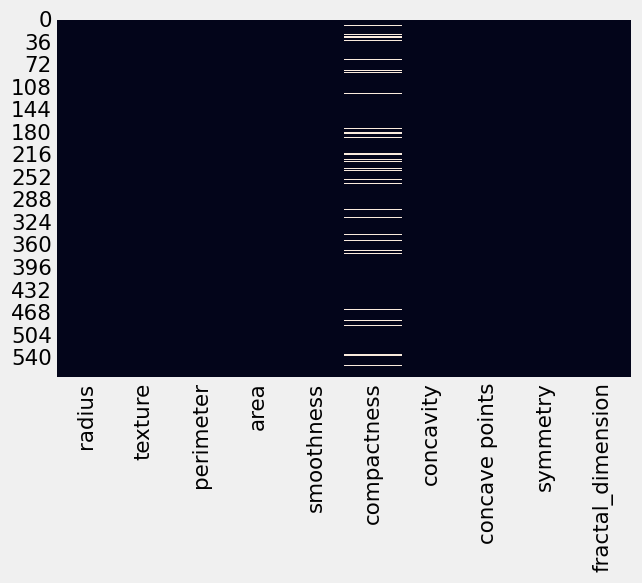

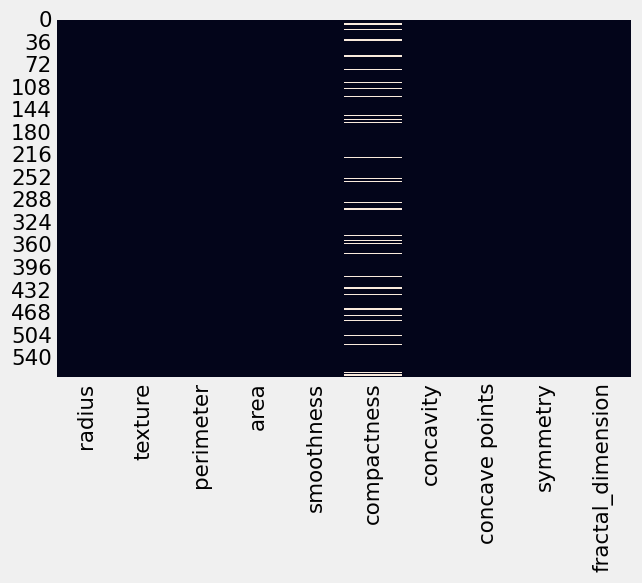

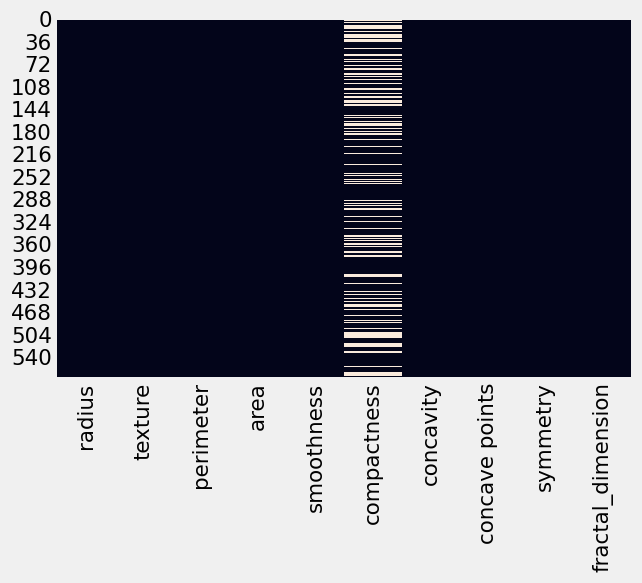

In [8]:
from src.visualization import plot_missing_data


plot_missing_data(MAR_05)
plot_missing_data(MAR_10)
plot_missing_data(MAR_30)

In [9]:
apply_metrics(X, MAR_05, ["compactness"])

2022-10-14 17:57:30,050 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,056 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,062 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,068 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:30,216 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,222 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,227 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,233 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:30,370 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,376 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,381 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,386 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:30,527 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,532 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,538 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,543 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:30,679 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,684 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,690 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,695 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:30,830 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,836 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,841 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,846 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:30,982 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,988 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,994 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:30,999 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:31,134 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,141 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,149 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,155 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:31,292 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,297 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,302 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,307 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:31,443 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,448 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,454 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,459 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:31,595 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,600 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,606 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,611 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:31,747 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,752 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,757 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,763 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:31,903 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,908 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,913 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:31,919 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:32,053 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,058 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,063 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,069 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:32,206 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,211 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,216 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,222 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:32,358 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,363 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,368 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,374 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:32,509 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,514 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,519 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,525 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:32,661 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,666 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,672 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,677 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:32,813 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,819 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,824 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,829 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:32,964 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,970 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,975 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:32,980 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:33,116 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,122 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,127 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,132 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:33,274 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,279 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,285 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,290 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:33,429 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,435 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,441 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,447 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:33,582 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,587 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,592 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,597 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:33,730 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,735 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,741 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,745 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:33,882 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,888 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,893 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:33,898 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:34,035 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,040 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,045 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,049 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:34,185 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,190 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,195 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,200 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:34,337 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,343 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,347 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,353 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:34,489 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,494 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,499 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,504 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:34,640 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,645 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,651 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,656 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:34,792 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,797 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,803 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,808 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:34,944 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,949 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,954 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:34,959 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:35,094 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:35,099 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:35,105 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:35,110 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

2022-10-14 17:57:35,244 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:35,249 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:35,255 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.
2022-10-14 17:57:35,260 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
Real Mean,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.181162,0.062798
Predicted Mean,14.127292,19.289649,91.969033,654.889104,0.09636,0.101043,0.088799,0.048919,0.181162,0.062798
Bias,0.0,0.0,0.0,0.0,0.0,0.003298,0.0,0.0,0.0,0.0
Confidence Interval,"(13.83711655080376, 14.417466928985345)","(18.935495107926062, 19.64380190437622)","(89.9682207569746, 93.96984602685669)","(625.9119941173284, 683.8662132640426)","(0.09520222089483825, 0.09751834149531995)","(0.09684891799617566, 0.10523654689946003)","(0.08223507346222733, 0.09536355817221906)","(0.04572406447365224, 0.05211422726624232)","(0.17890453202819473, 0.18341919380660315)","(0.06221624953436705, 0.06337897014928848)"
Coverage Rate,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## ML model pipeline for classification

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    train_size=0.7)

# Amputation
Ampute X_train here. Let's leave the X_test set without any amputation so that we can compare how the amputation in the training set is affecting the predictions on a full test set. 

In [11]:
from src.model import train

rf = train(X_train, y_train)

In [12]:
pred = rf.predict(X_test)

## Evaluate somehow our results

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.93      0.89      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



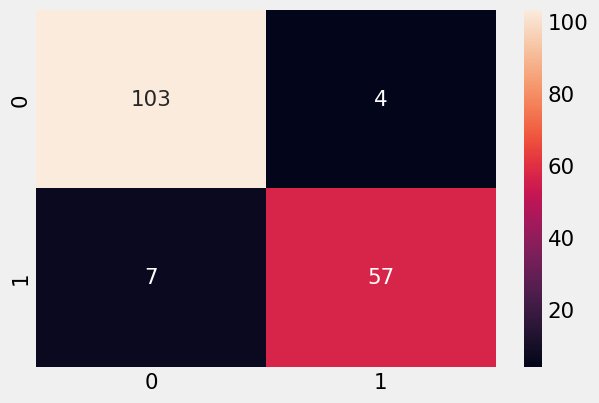

In [13]:
from sklearn.metrics import classification_report
from src.visualization import plot_confusion_matrix

print(classification_report(y_test, pred))
plot_confusion_matrix(y_test, pred, [0, 1])

In [14]:
import pandas as pd

feature_scores = pd.Series(rf["rf"].feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

concave points       0.310279
perimeter            0.161415
area                 0.150901
radius               0.144392
concavity            0.133058
compactness          0.041738
texture              0.031813
smoothness           0.013322
fractal_dimension    0.006805
symmetry             0.006277
dtype: float64

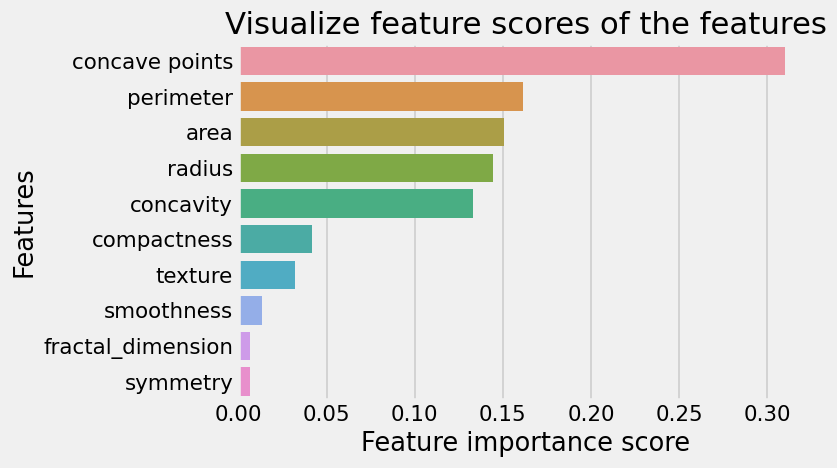

In [15]:
plot_feature_importance(feature_scores)

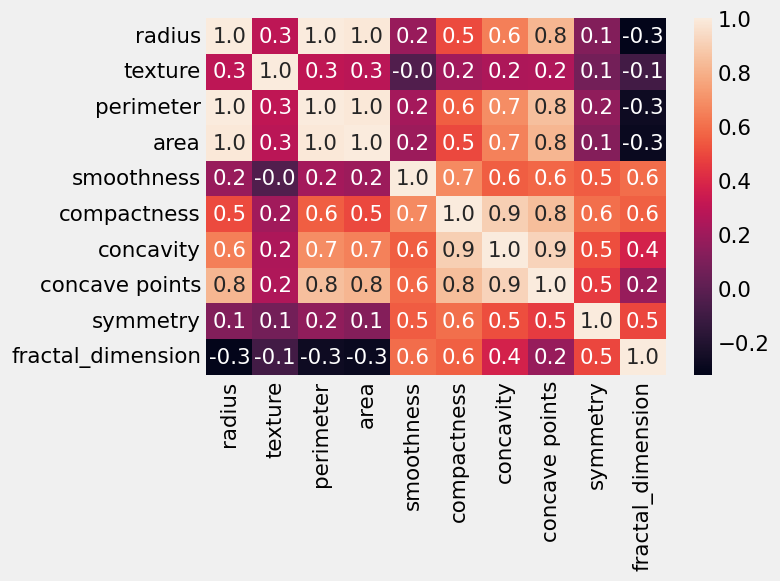

In [16]:
plot_correlation_matrix(X_train)

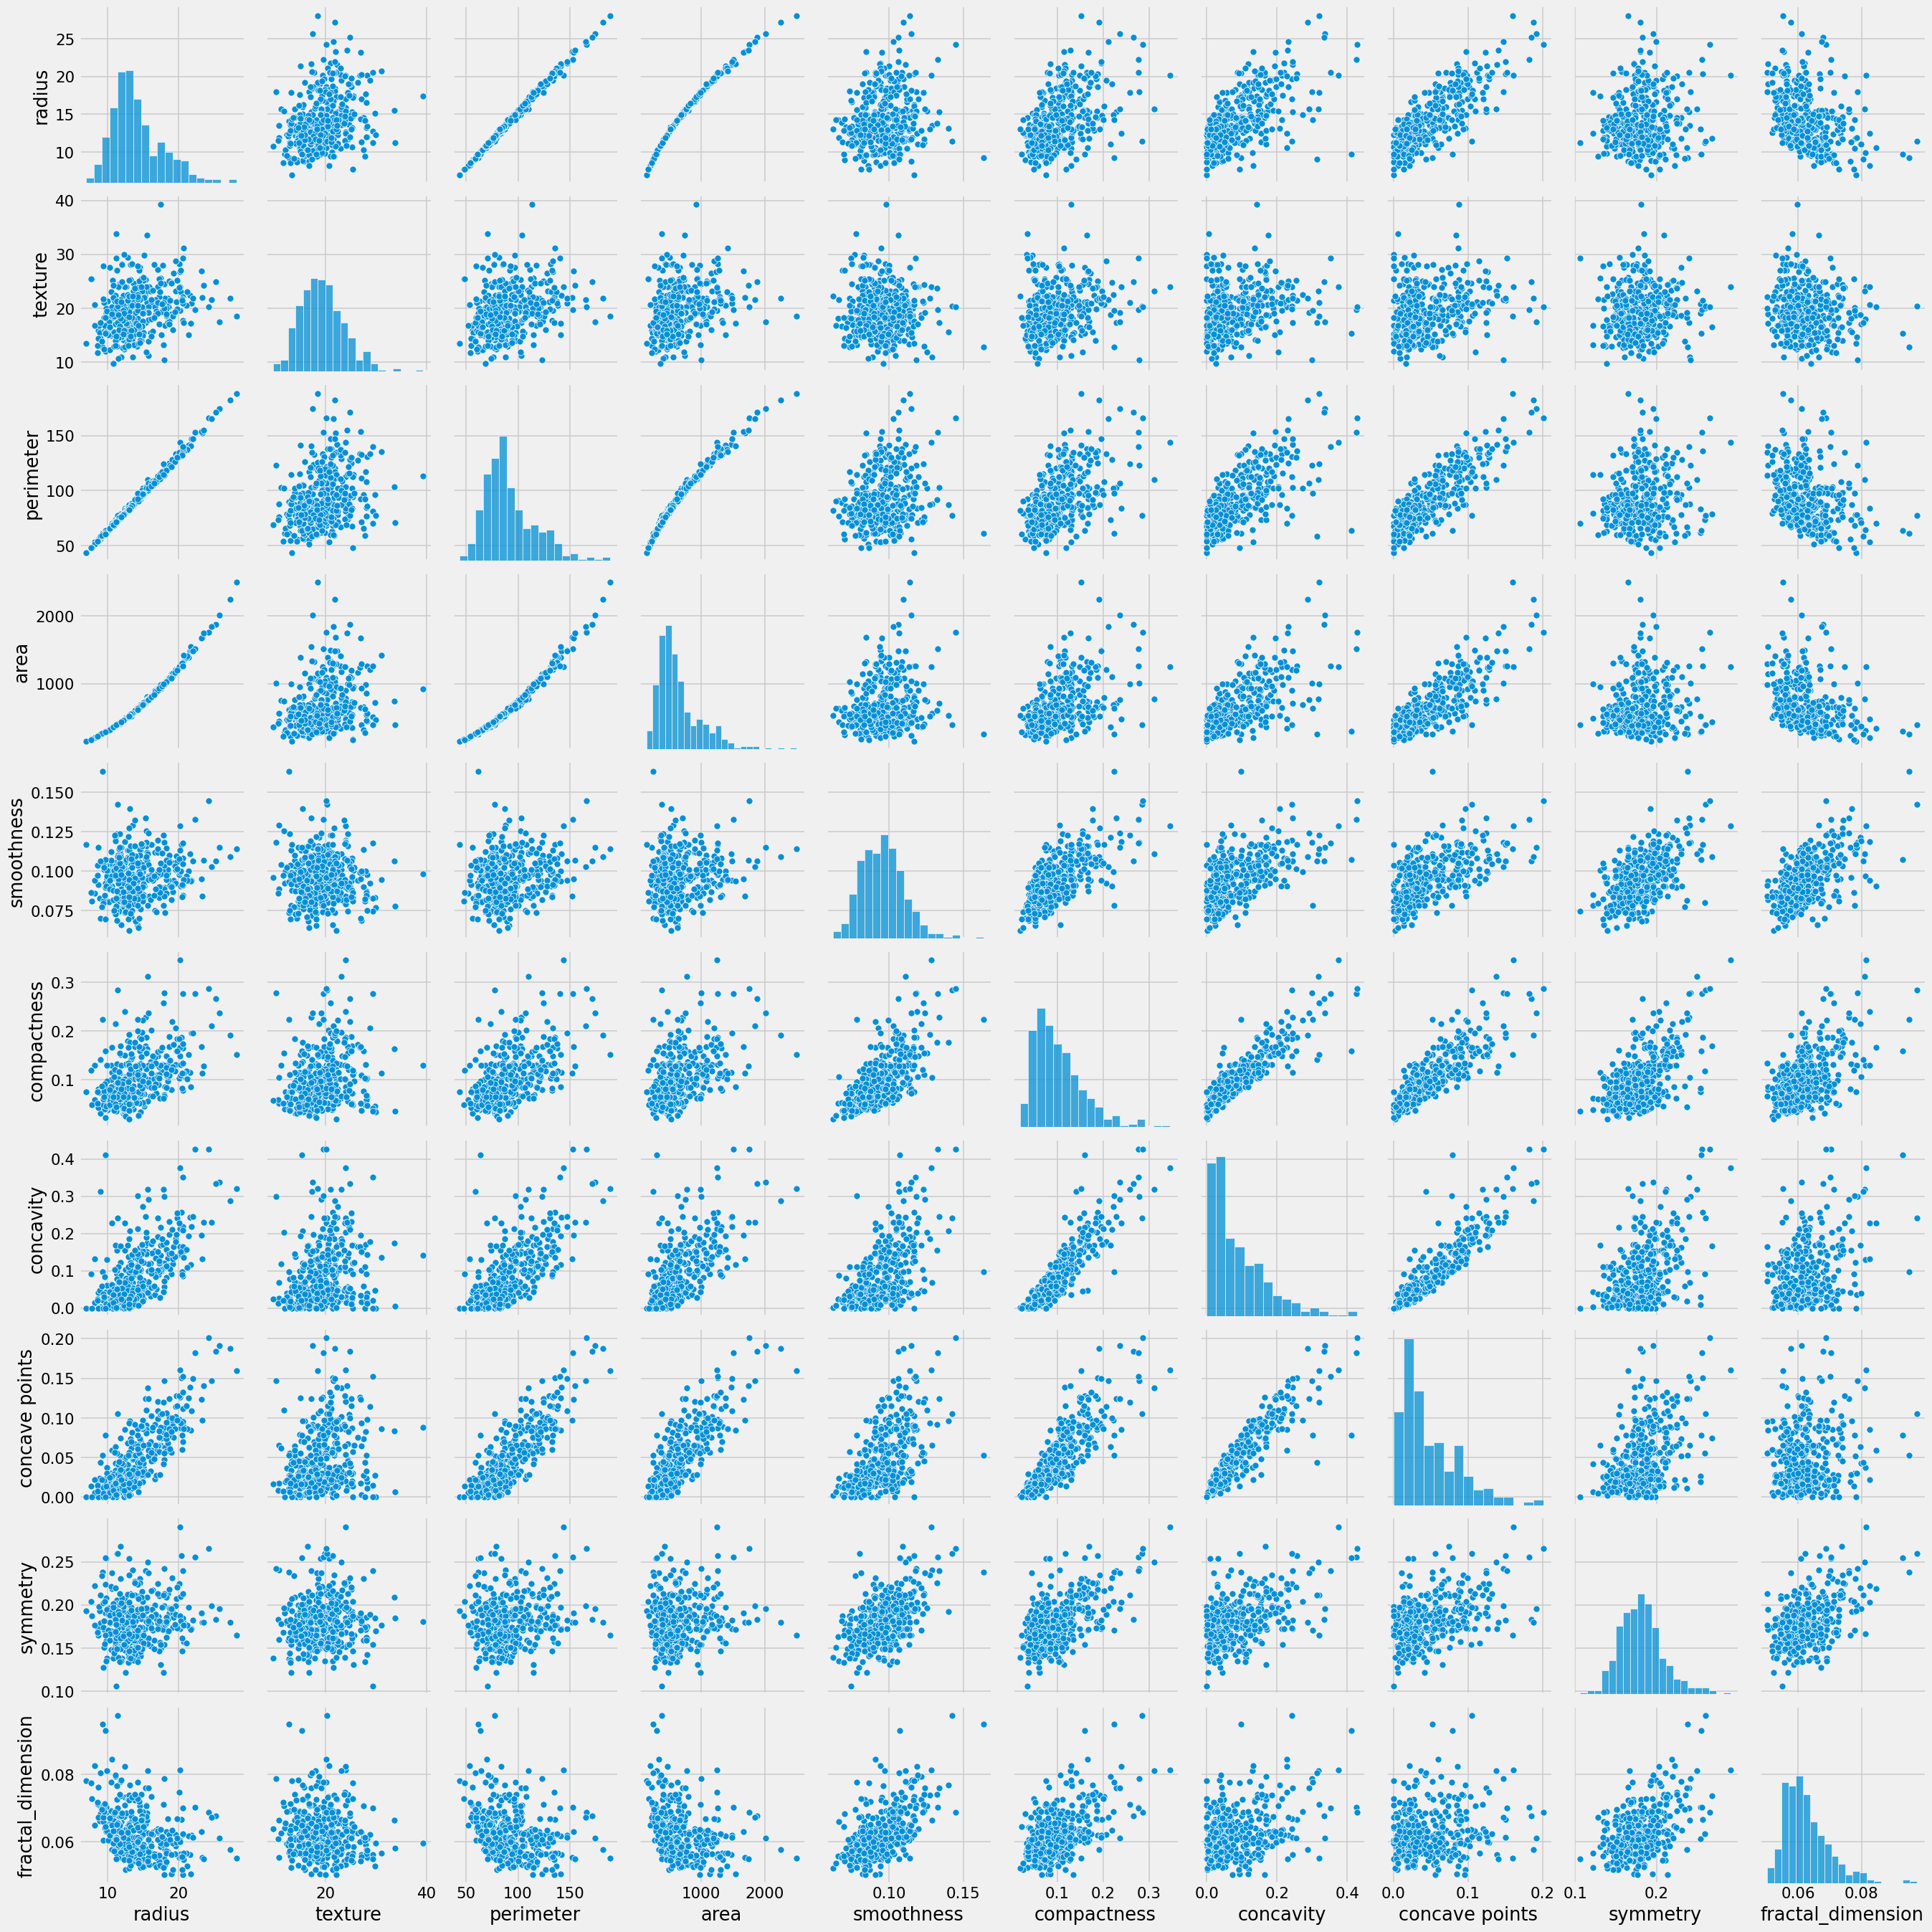

In [17]:
from src.visualization import plot_pairplot

plot_pairplot(X_train, X_train.columns)

# Mean for every column

In [18]:
X_train.mean()

radius                14.126503
texture               19.438241
perimeter             91.904422
area                 655.325377
smoothness             0.095857
compactness            0.102648
concavity              0.088497
concave points         0.048535
symmetry               0.181364
fractal_dimension      0.062620
dtype: float64

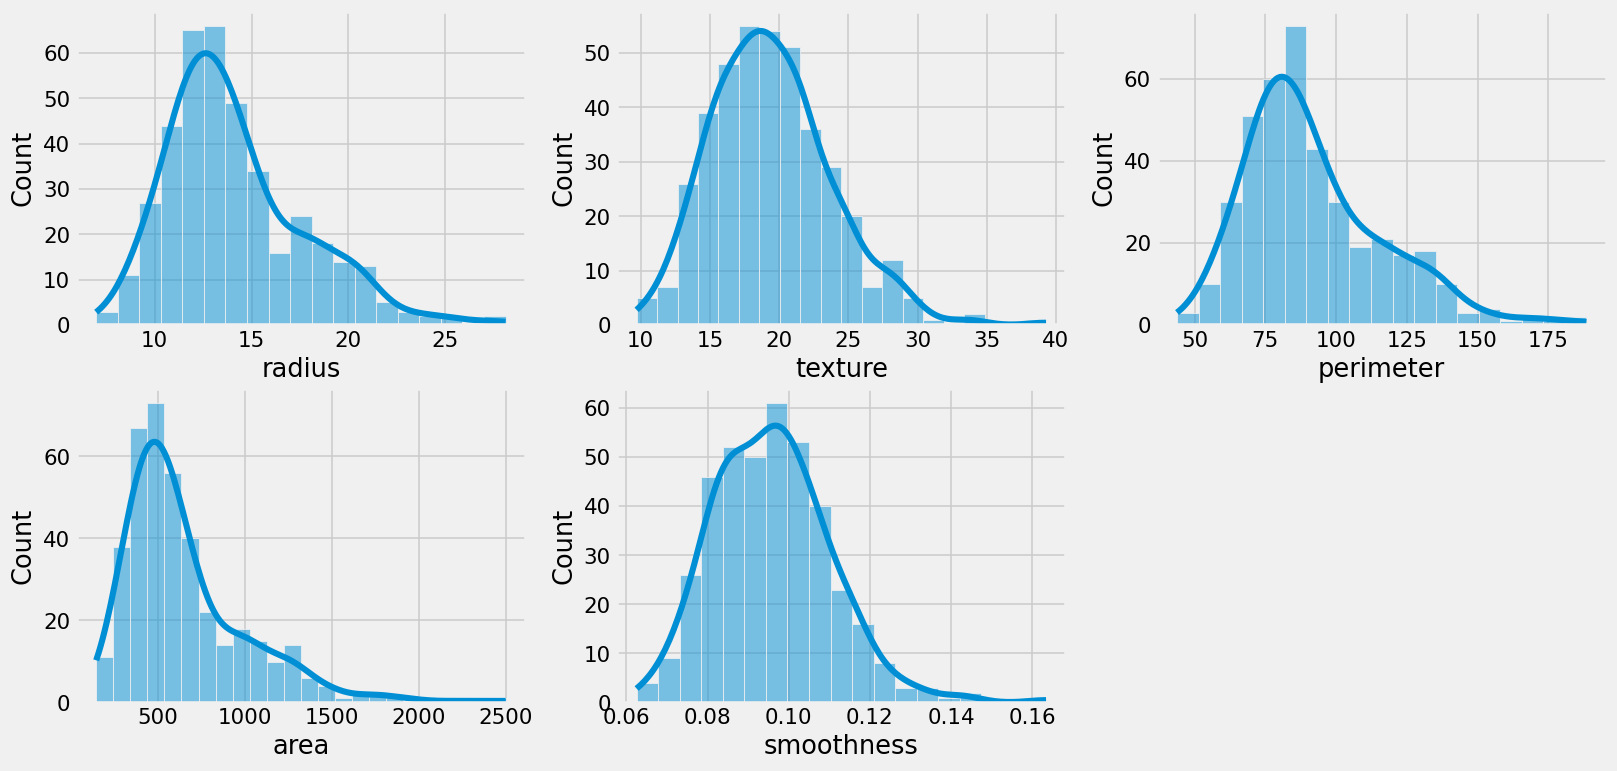

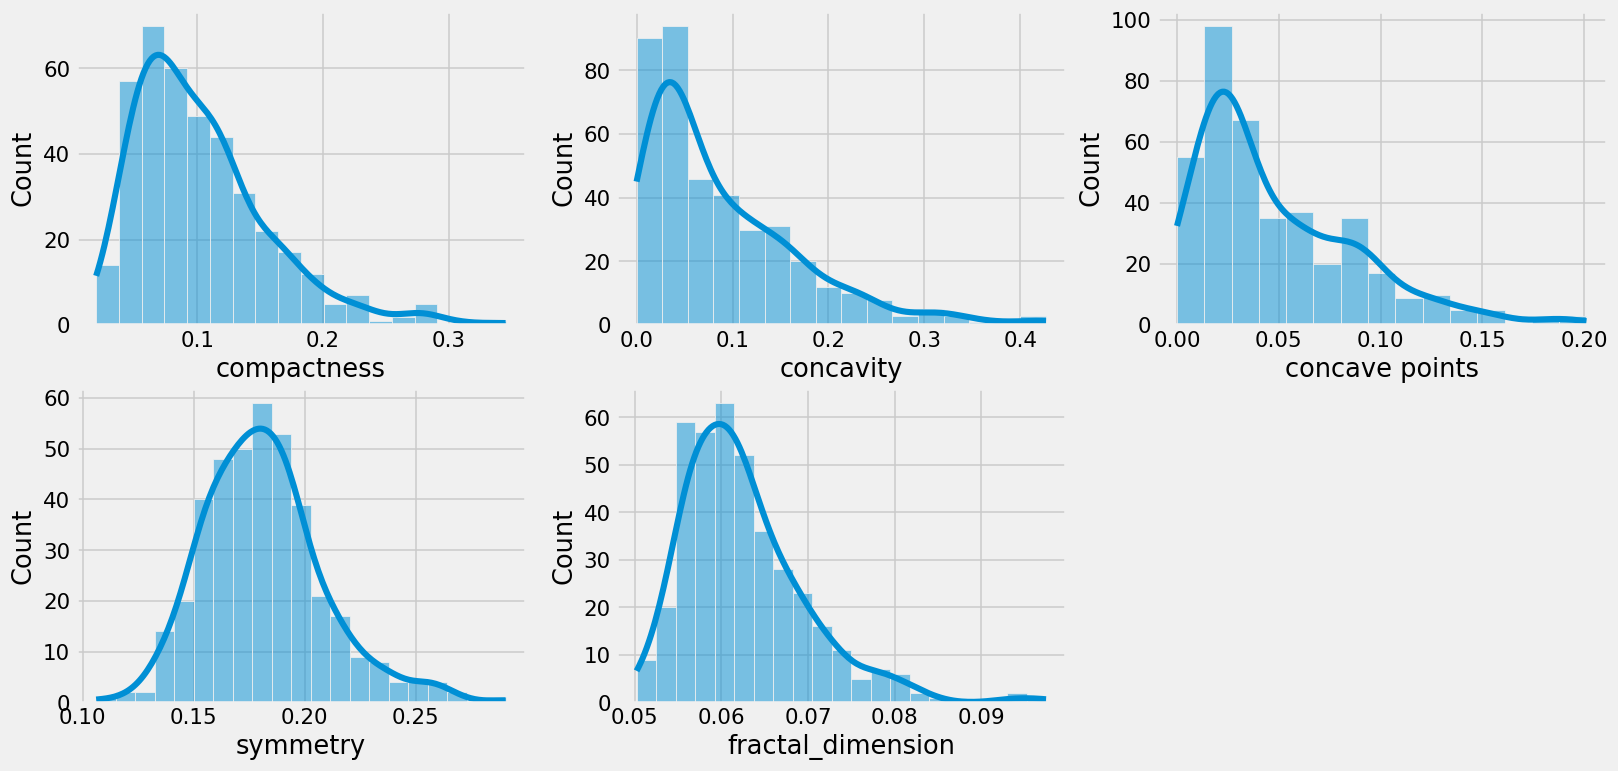

In [19]:
from src.visualization import plot_multiple_distribution_grid

plot_multiple_distribution_grid(X_train, X_train.columns[:5])
plot_multiple_distribution_grid(X_train, X_train.columns[5:])

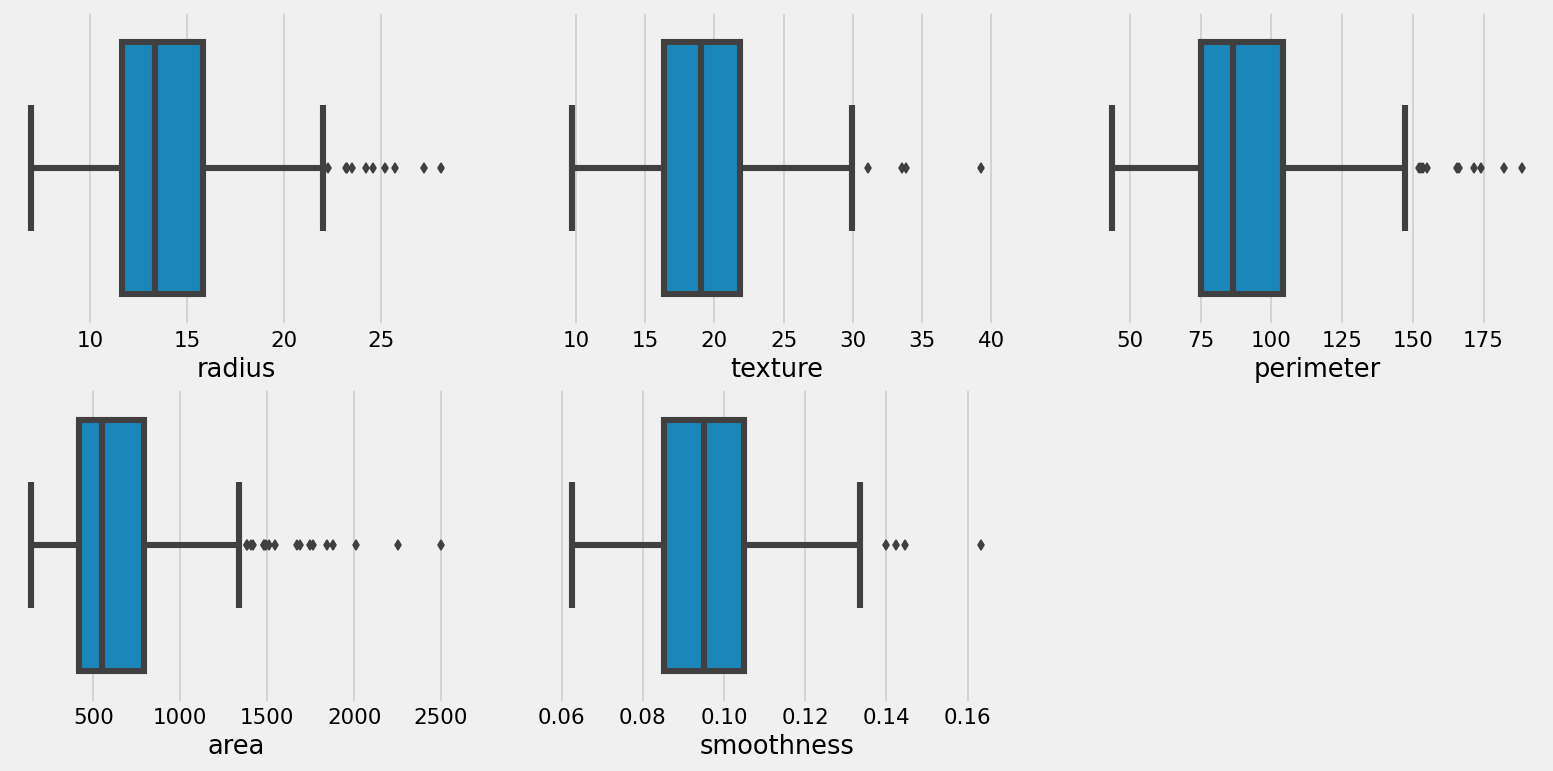

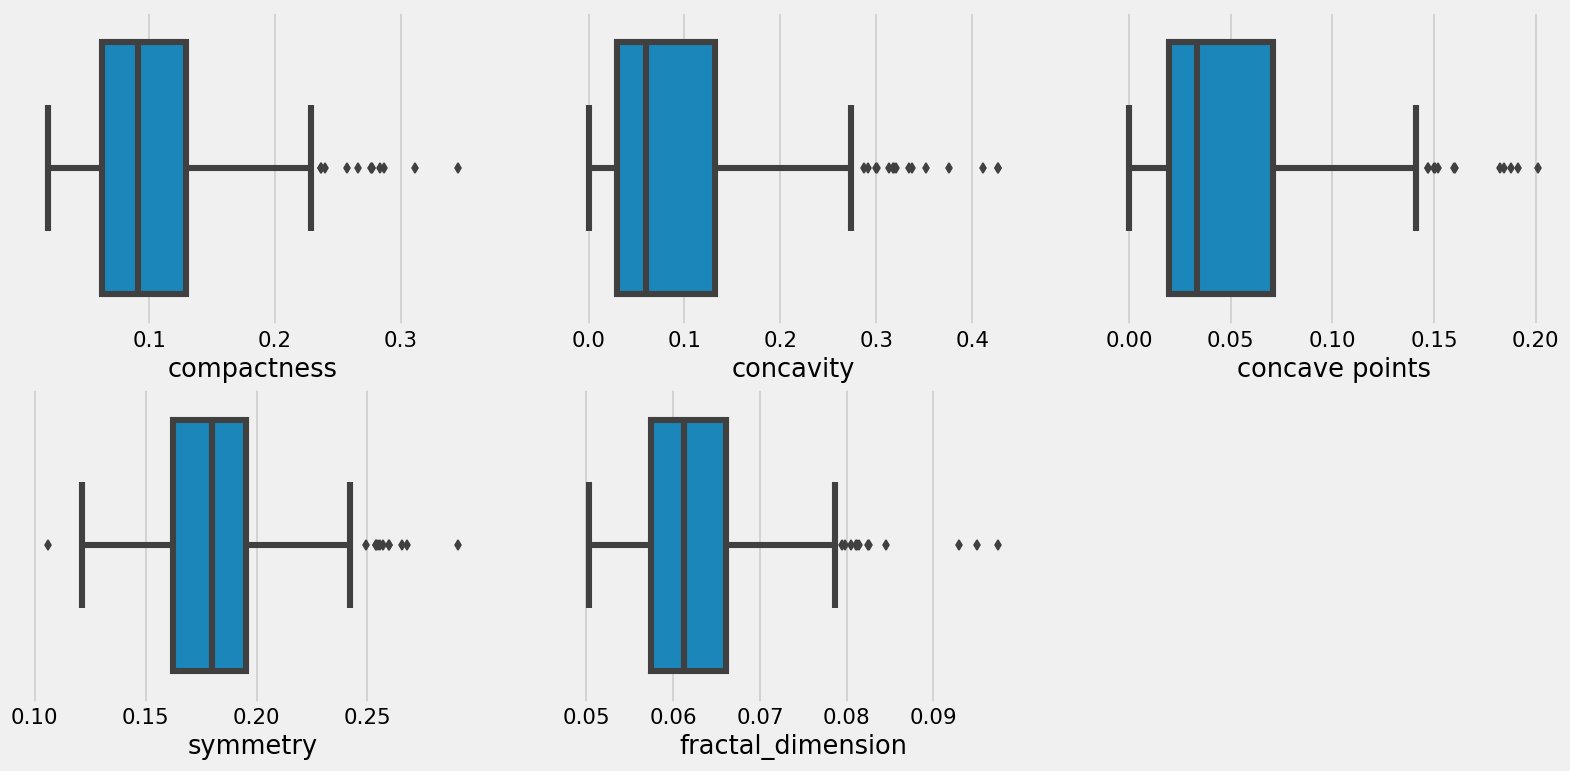

In [20]:
from src.visualization import plot_multiple_boxplot_grid

plot_multiple_boxplot_grid(X_train, X_train.columns[:5])
plot_multiple_boxplot_grid(X_train, X_train.columns[5:])

In [21]:
# from src.visualization import plot_boxplot
# 
# for col in X_train:
#     plot_distribution(X_train[col])
#     plot_boxplot(X_train[col])